In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [3]:
df = pd.read_csv('D:\PYTHON_EXERCISES_LUKE\job_postings_flat_from_luke.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\User\AppData\Local\Temp\ipykernel_7376\3129965082.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\PYTHON_EXERCISES_LUKE\job_postings_flat_from_luke.csv')


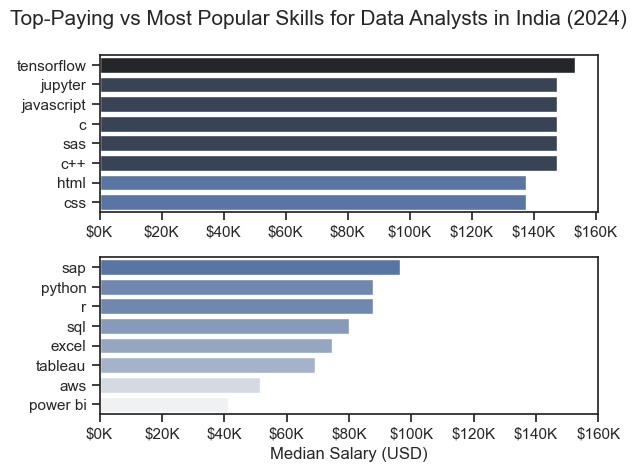

In [4]:
# FINAL

top_n = 8

# Filter data: 2024, Data Analyst, India
df_DA_IN_2024 = (
    df[(df['job_posted_date'].dt.year == 2024) & 
    (df['job_title_short'] == 'Data Analyst') & 
    (df['job_country'] == 'India')]
).copy()
## Kalau pakai cara lain yaitu df.query(), jadi:
## df_DA_IN_2024 = df.query(
##      "job_posted_date.dt.year == 2024 and job_title_short == 'Data Analyst' and job_country == 'India'"
## )

# Drop NaN values dan explode job_skills
df_DA_IN_2024.dropna(subset='salary_year_avg', inplace=True)
df_explode = df_DA_IN_2024.explode('job_skills')

df_grouped = (
    df_explode
    .groupby('job_skills')['salary_year_avg']
    .agg(['count', 'median'])
    .rename(columns={'count': 'skill_count', 'median': 'median_salary'})
    .reset_index()
)
## Kalau pakai cara lain:
## df_grouped = (
##     df_explode
##     .groupby('job_skills')
##     .agg(
##         skill_count=('salary_year_avg', 'count'),
##         median_salary=('salary_year_avg', 'median')
##     )
## )

total_jobs = len(df_DA_IN_2024)

df_grouped['skill_pct'] = 100 * df_grouped['skill_count'] / total_jobs

df_grouped_median = (
    df_grouped
    .sort_values(by='median_salary', ascending=False)
    .head(top_n)
)
## Kalau pakai cara lain:
## df_grouped_median = df_grouped.nlargest(top_n, 'median_salary')

df_grouped_cnt = (
    df_grouped
    .sort_values(by='skill_count', ascending=False)
    .head(top_n)
    .sort_values(by='median_salary', ascending=False)
)
## Kalau pakai cara lain:
## df_grouped_cnt = df_grouped.nlargest(top_n, 'skill_count').sort_values(by='median_salary', ascending=False)

sns.set_theme(style='ticks')
fig, ax = plt.subplots(2, 1)

sns.barplot(
    data=df_grouped_median,
    x='median_salary',
    y='job_skills',
    ax=ax[0],
    hue='median_salary',
    palette='dark:b_r',
    legend=False
)
ax[0].set_xlabel('')

sns.barplot(
    data=df_grouped_cnt,
    x='median_salary',
    y='job_skills',
    ax=ax[1],
    hue='median_salary',
    palette='light:b',
    legend=False
)
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(0, 160000)

for i in range(2):
    ax[i].set_ylabel('')
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.suptitle('Top-Paying vs Most Popular Skills for Data Analysts in India (2024)', fontsize=15)
fig.tight_layout()
plt.show()

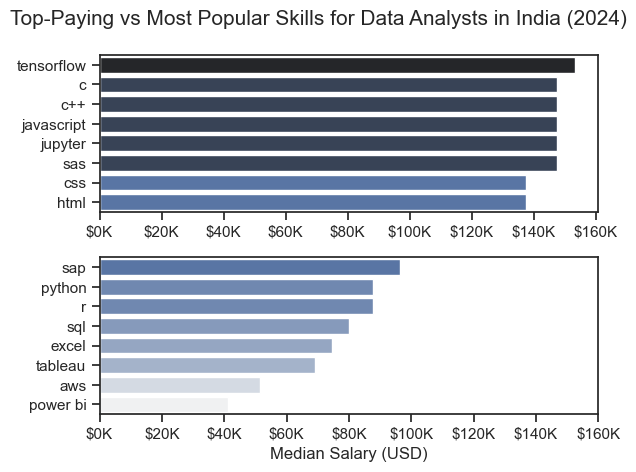

In [5]:
# FINAL (REFINED VERSION)

top_n = 8

# Filter data: 2024, Data Analyst, India
df_DA_IN_2024 = df.query(
    "job_posted_date.dt.year == 2024 and job_title_short == 'Data Analyst' and job_country == 'India'"
).copy()

# Drop NaN values dan explode job_skills
df_DA_IN_2024.dropna(subset='salary_year_avg', inplace=True)
df_explode = df_DA_IN_2024.explode('job_skills')

df_grouped = (
    df_explode
    .groupby('job_skills')
    .agg(
        skill_count=('salary_year_avg', 'count'),
        median_salary=('salary_year_avg', 'median')
    )
    .reset_index()
)

total_jobs = len(df_DA_IN_2024)

df_grouped['skill_pct'] = 100 * df_grouped['skill_count'] / total_jobs

df_grouped_median = df_grouped.nlargest(top_n, 'median_salary')

df_grouped_cnt = df_grouped.nlargest(top_n, 'skill_count').sort_values(by='median_salary', ascending=False)

sns.set_theme(style='ticks')
fig, ax = plt.subplots(2, 1)

sns.barplot(
    data=df_grouped_median,
    x='median_salary',
    y='job_skills',
    ax=ax[0],
    hue='median_salary',
    palette='dark:b_r',
    legend=False
)
ax[0].set_xlabel('')

sns.barplot(
    data=df_grouped_cnt,
    x='median_salary',
    y='job_skills',
    ax=ax[1],
    hue='median_salary',
    palette='light:b',
    legend=False
)
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(0, 160000)

for axis in ax:
    axis.set_ylabel('')
    axis.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.suptitle('Top-Paying vs Most Popular Skills for Data Analysts in India (2024)', fontsize=15)
fig.tight_layout()
plt.show()

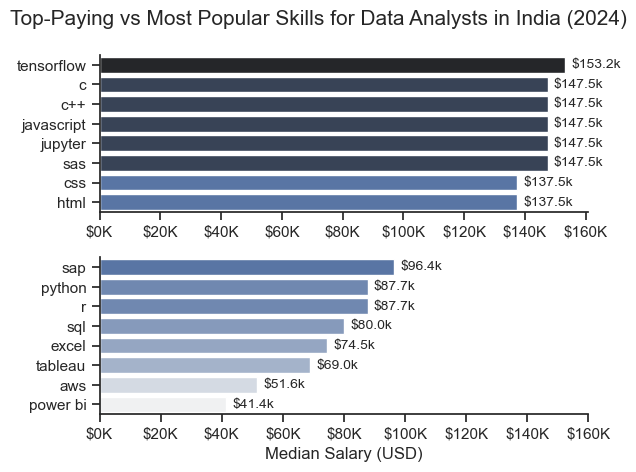

In [ ]:
# test2 ubah label grafik

top_n = 8

# Filter data: 2024, Data Analyst, India
df_DA_IN_2024 = df.query(
    "job_posted_date.dt.year == 2024 and job_title_short == 'Data Analyst' and job_country == 'India'"
).copy()

# Drop NaN values dan explode job_skills
df_DA_IN_2024.dropna(subset='salary_year_avg', inplace=True)
df_explode = df_DA_IN_2024.explode('job_skills')

df_grouped = (
    df_explode
    .groupby('job_skills')
    .agg(
        skill_count=('salary_year_avg', 'count'),
        median_salary=('salary_year_avg', 'median')
    )
    .reset_index()
)

total_jobs = len(df_DA_IN_2024)

df_grouped['skill_pct'] = 100 * df_grouped['skill_count'] / total_jobs

df_grouped_median = df_grouped.nlargest(top_n, 'median_salary')

df_grouped_cnt = df_grouped.nlargest(top_n, 'skill_count').sort_values(by='median_salary', ascending=False)

sns.set_theme(style='ticks')
fig, ax = plt.subplots(2, 1)

sns.barplot(
    data=df_grouped_median,
    x='median_salary',
    y='job_skills',
    ax=ax[0],
    hue='median_salary',
    palette='dark:b_r',
    legend=False
)
ax[0].set_xlabel('')

for idx, v in enumerate(df_grouped_median['median_salary']):
    #axis_x = df_grouped_median['median_salary'].iloc[0]
    ax[0].text(v + 2000, idx, f'${(v/1000):.1f}k', va='center', fontsize=10)

sns.barplot(
    data=df_grouped_cnt,
    x='median_salary',
    y='job_skills',
    ax=ax[1],
    hue='median_salary',
    palette='light:b',
    legend=False
)
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(0, 160000)

for idx, v in enumerate(df_grouped_cnt['median_salary']):
    #axis_x = df_grouped_cnt['median_salary'].iloc[0]
    ax[1].text(v + 2000, idx, f'${(v/1000):.1f}k', va='center', fontsize=10)

for axis in ax:
    axis.set_ylabel('')
    axis.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
    #axis.set_xticks([])

sns.despine()
plt.suptitle('Top-Paying vs Most Popular Skills for Data Analysts in India (2024)', fontsize=15)
fig.tight_layout()
plt.show()

In [39]:
df_grouped_median['median_salary']

56    153250.0
5     147500.0
7     147500.0
21    147500.0
23    147500.0
41    147500.0
9     137500.0
19    137500.0
Name: median_salary, dtype: float64